# Feature Selection on Ionosphere Dataset

This notebook performs feature selection on the Ionosphere dataset using:
1. Constant Feature Removal (columns with only one unique value)
2. Quasi-Constant Feature Removal (columns with 99%+ of the same value)
3. Duplicate Feature Removal (columns with identical values)
4. Correlation Analysis (removing highly correlated features)
5. Mutual Information (ranking features based on predictive power)

In [1]:
#imports

import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Step-1:** Load the data

In [2]:
df = pd.read_csv('/kaggle/input/ionosphere-dataset/ionosphere.data')
df.columns = [f"feature_{i}" for i in range(df.shape[1]-1)] + ["target"]

X= df.drop(columns=['target'])
y = df['target'].apply(lambda x:1 if x == 'g' else 0)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


**Step-2:** A constant feature has the SAME value in all rows (no variance).
These features don’t help ML models since they add no information.

In [3]:
constant_feature = [col for col in X_train.columns if X_train[col].std() == 0]

print("Constant Features: ",constant_feature)

X_train.drop(columns=constant_feature, inplace=True)
X_test.drop(columns=constant_feature, inplace=True)
print(X_train)

Constant Features:  ['feature_1']
     feature_0  feature_2  feature_3  feature_4  feature_5  feature_6  \
228          1    0.73523   -0.38293    0.80151    0.10278    0.78826   
78           0    1.00000    1.00000    1.00000   -1.00000    1.00000   
90           1    0.84557   -0.08580   -0.31745   -0.80553   -0.08961   
16           0    0.00000    0.00000   -1.00000   -1.00000    1.00000   
66           0    1.00000   -1.00000    1.00000   -1.00000    1.00000   
..         ...        ...        ...        ...        ...        ...   
71           1    0.96087    0.08620    0.96760    0.19279    0.96026   
106          1    0.99449    0.00526    0.84082   -0.11313    0.88237   
270          1    0.47938   -0.12371    0.42784   -0.12371    0.70103   
348          1    0.90608   -0.01657    0.98122   -0.01989    0.95691   
102          1    0.95704   -0.12095    0.63318   -0.12690    0.96365   

     feature_7  feature_8  feature_9  feature_10  ...  feature_24  feature_25  \
228    0

**Step-3:** Quasi Constant Feature Removal

In [4]:
threshold = 0.98
quasi_features = []

for col in X_train.columns:
    top_freq = X_train[col].value_counts(normalize=True).iloc[0]
    if top_freq >= threshold:
        quasi_features.append(col)

print(quasi_features)

[]


**Step-4:** Duplicate Features

In [5]:
train_T = X_train.T

duplicate_features = train_T[train_T.duplicated()].index.tolist()

print(duplicate_features)

X_train.drop(columns=duplicate_features, inplace=True)
X_test.drop(columns=duplicate_features, inplace=True)

[]


**Step-4:** Correlation Analysis

In [6]:
corr_matrix = X_train.corr()
corr_threshold = 0.98
corr_pairs = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > corr_threshold:
            corr_pairs.add(corr_matrix.columns[i])

print(corr_pairs)

set()


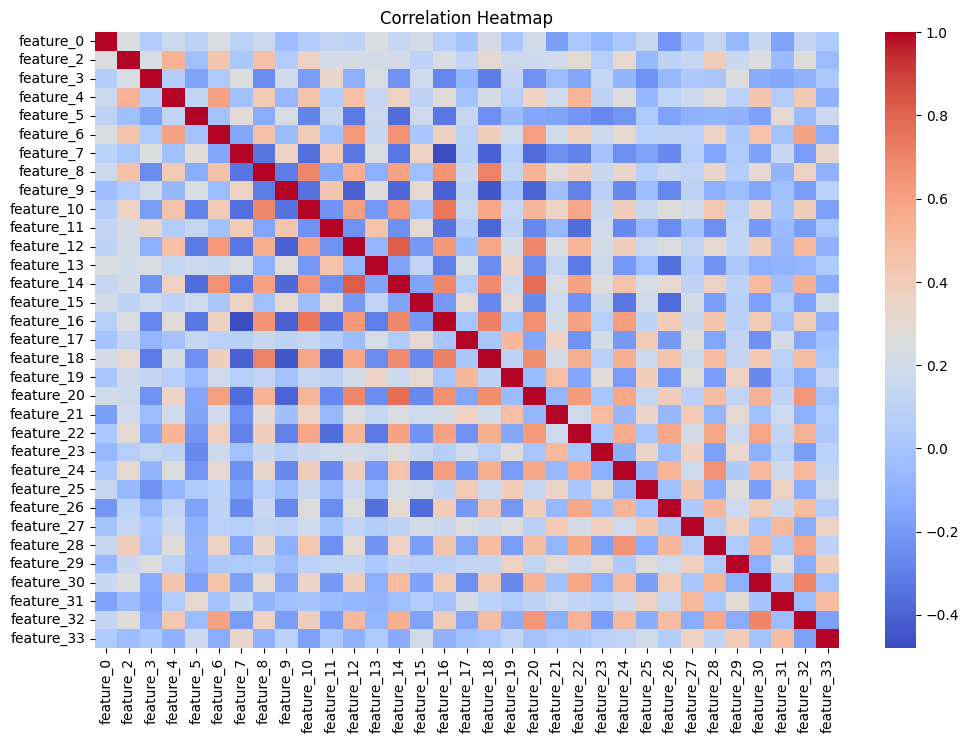

In [7]:
#HeatMap

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


**Step-5:** Mutual Information

In [8]:
mi_scores = mutual_info_classif(X_train, y_train, discrete_features=False)
mi_df = pd.DataFrame({"Features": X_train.columns, "MI Score": mi_scores})
mi_df = mi_df.sort_values(by="MI Score",ascending=False)

print(f"{mi_df}\n")

selected_features = mi_df[mi_df["MI Score"] > 0.01]["Features"].tolist()
X_train = X_train[selected_features]
X_test = X_test[selected_features]


      Features  MI Score
3    feature_4  0.314536
12  feature_13  0.310519
4    feature_5  0.302087
31  feature_32  0.286124
25  feature_26  0.283864
27  feature_28  0.278812
6    feature_7  0.271800
1    feature_2  0.260717
29  feature_30  0.245111
5    feature_6  0.244813
21  feature_22  0.244801
14  feature_15  0.236247
22  feature_23  0.234416
19  feature_20  0.233045
13  feature_14  0.230889
32  feature_33  0.229190
20  feature_21  0.222793
30  feature_31  0.205313
15  feature_16  0.203492
18  feature_19  0.198000
23  feature_24  0.194550
2    feature_3  0.193828
7    feature_8  0.193272
28  feature_29  0.189877
10  feature_11  0.189498
11  feature_12  0.187401
8    feature_9  0.186918
16  feature_17  0.185021
26  feature_27  0.184442
24  feature_25  0.182287
9   feature_10  0.177027
17  feature_18  0.151911
0    feature_0  0.092142



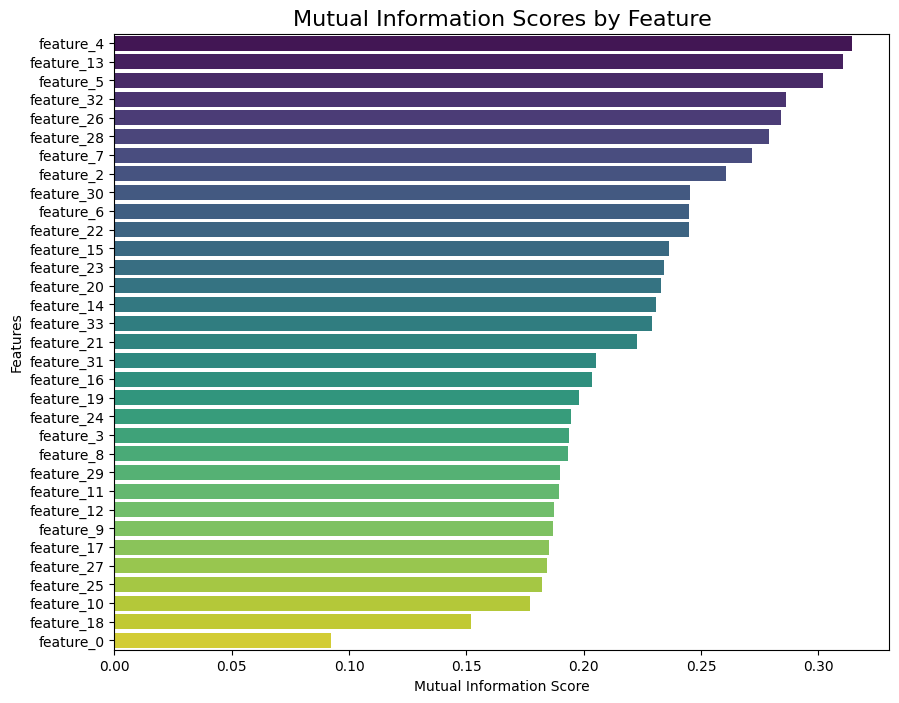

In [9]:

plt.figure(figsize=(10, 8))
sns.barplot(x="MI Score", y="Features", data=mi_df, palette="viridis")

plt.title("Mutual Information Scores by Feature", fontsize=16)
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.show()


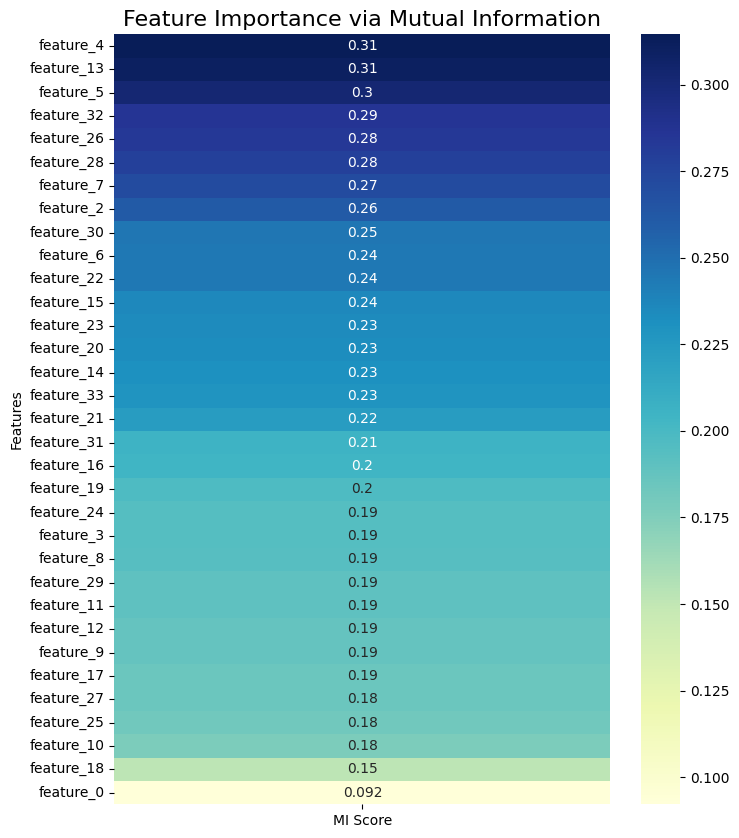

In [10]:
mi_df_sorted = mi_df.set_index("Features")

plt.figure(figsize=(8, 10))
sns.heatmap(mi_df_sorted[["MI Score"]], annot=True, cmap="YlGnBu", cbar=True)
plt.title("Feature Importance via Mutual Information", fontsize=16)
plt.show()
